Variance
0.195836375091
0.993252029531
Norm1
0.194979701019
0.791034375021
Outlier
0.259595246882
3.35855076863
Cross-entropy
0.167938703994
8.47723928405


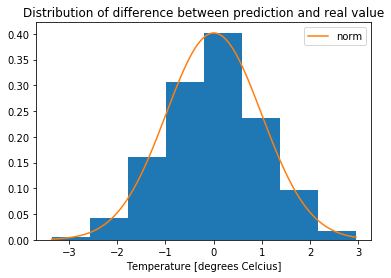

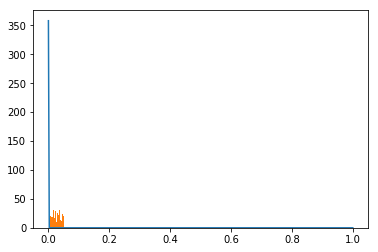

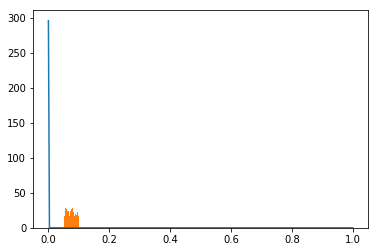

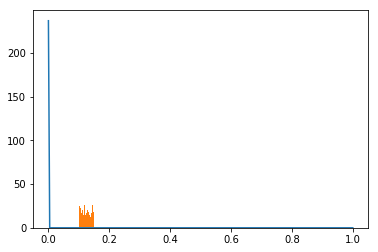

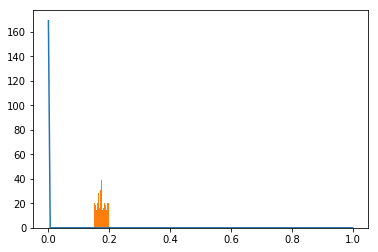

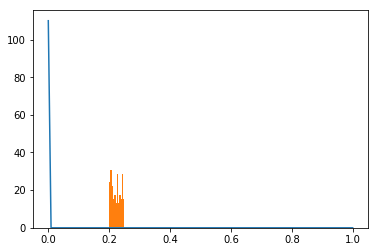

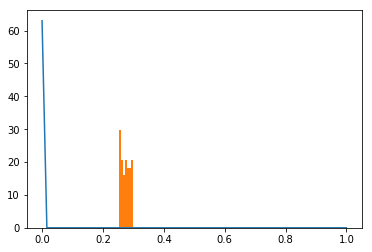

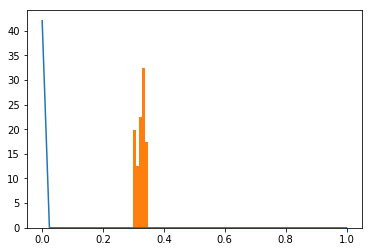

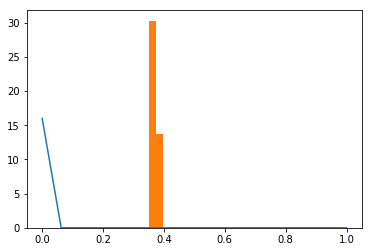

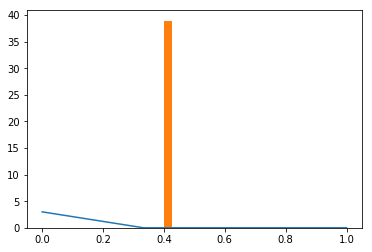

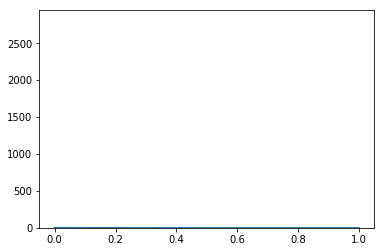

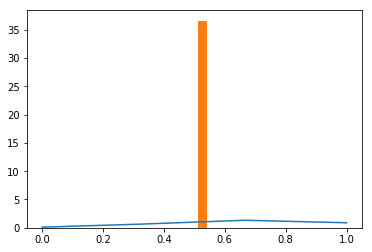

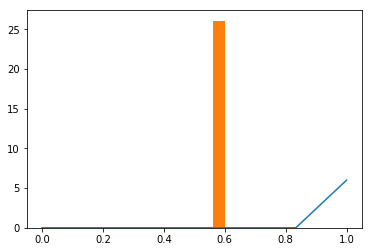

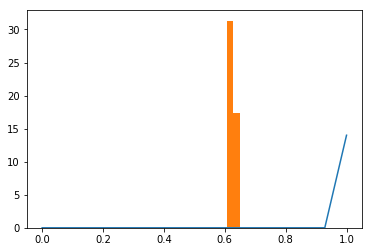

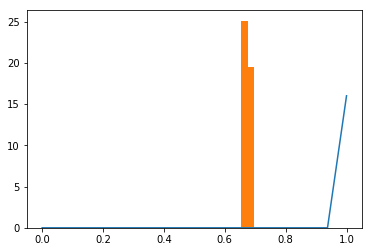

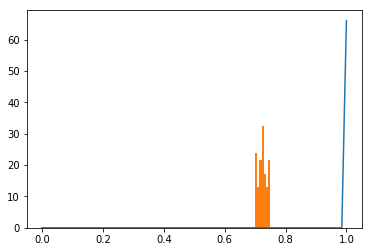

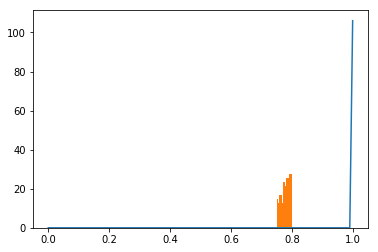

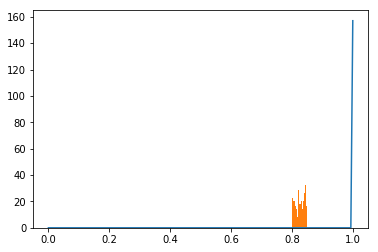

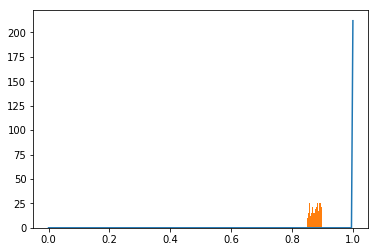

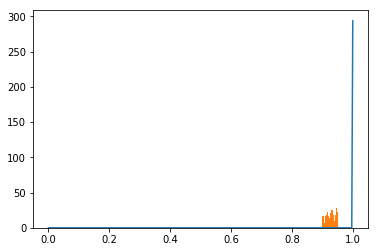

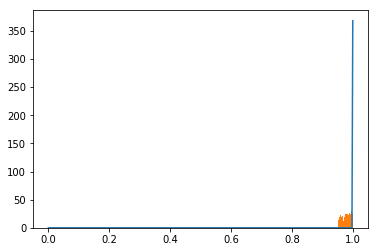

0

In [5]:
# %load tests.py
import AN_comp_utilities as utils
import numpy as np

# create random weathor conditions to scale parameters in methods according to
# what is subjectively assumed a "good prediction"

true = np.random.normal(10,3,1000)
#true[true<0] = 0
prediction = true + np.random.normal(0,1,1000)
#prediction[prediction<0] = 0

# realistic prediction data
p = 0.5
rain = np.random.choice(a=[False, True], size=5000, p=[p, 1-p])
prob_rain = rain*100 + np.random.normal(0,15,5000)
prob_rain[prob_rain<0] = 0
prob_rain[prob_rain>100] = 100

data_type = 'temperature'
days_ahead = 1

measure, value, differencesTemp, per = utils.compare_time_series(prediction,true,days_ahead,utils.variance,data_type)
print('Variance')
print(measure)
print(value)

measure, value, differences, per = utils.compare_time_series(prediction,true,days_ahead,utils.norm1,data_type)
print('Norm1')
print(measure)
print(value)

measure, value, differences, per = utils.compare_time_series(prediction,true,days_ahead,utils.outlier,data_type)
print('Outlier')
print(measure)
print(value)

measure, value, differences, per = utils.compare_time_series(prob_rain,rain,1,utils.cross_entropy,'prob_rain')
print('Cross-entropy')
print(measure)
print(value)

utils.fit_distr(differencesTemp,data_type = 'temperature',fit_with='norm')

utils.plot_histograms_rain(prob_rain,rain)


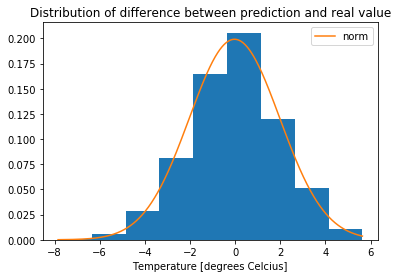

(array([ -7.84356850e+00,  -7.83007677e+00,  -7.81658504e+00,
         -7.80309331e+00,  -7.78960159e+00,  -7.77610986e+00,
         -7.76261813e+00,  -7.74912640e+00,  -7.73563467e+00,
         -7.72214294e+00,  -7.70865121e+00,  -7.69515948e+00,
         -7.68166775e+00,  -7.66817603e+00,  -7.65468430e+00,
         -7.64119257e+00,  -7.62770084e+00,  -7.61420911e+00,
         -7.60071738e+00,  -7.58722565e+00,  -7.57373392e+00,
         -7.56024219e+00,  -7.54675046e+00,  -7.53325874e+00,
         -7.51976701e+00,  -7.50627528e+00,  -7.49278355e+00,
         -7.47929182e+00,  -7.46580009e+00,  -7.45230836e+00,
         -7.43881663e+00,  -7.42532490e+00,  -7.41183317e+00,
         -7.39834145e+00,  -7.38484972e+00,  -7.37135799e+00,
         -7.35786626e+00,  -7.34437453e+00,  -7.33088280e+00,
         -7.31739107e+00,  -7.30389934e+00,  -7.29040761e+00,
         -7.27691588e+00,  -7.26342416e+00,  -7.24993243e+00,
         -7.23644070e+00,  -7.22294897e+00,  -7.20945724e+00,
        

In [2]:
utils.fit_distr(prediction-true)

In [19]:
# run or real data

pred = np.load('Berlin_0628to0711_1daypred.npz')
real = np.load('Berlin_0628to0708.npz')

In [26]:
what = 'temp_max'
true = real[what]
prediction = pred[what][0:len(true)]
data_type = 'temperature'
days_ahead = 1

measure, value, differencesTemp, per = utils.compare_time_series(prediction,true,days_ahead,utils.variance,data_type)
print('Variance')
print(measure)
print(value)

Variance
0.135001225181
1.85717282693


In [27]:
true

array([ 28.9,  30.8,  22.4,  22.6,  24.9,  28.3,  31.9,  32.3,  24.2,
        26.7,  27.8])

In [28]:
prediction

array([ 27.,  29.,  22.,  20.,  22.,  28.,  31.,  29.,  26.,  27.,  27.])